# Testing the model on another dataset (CIC 2019)

In [12]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the file
cic_df=pd.read_csv('cicddos2019_dataset.csv', index_col=0)

# Renaming columns to match the model
rename_column =  {'Packet Length Max': 'Max Packet Length',
                  'Init Fwd Win Bytes':'Init_Win_bytes_forward',
                  'Bwd Packets Length Total':'Total Length of Bwd Packets',
                  'Packet Length Min':'Min Packet Length',
                  'Fwd Seg Size Min':'min_seg_size_forward',
                  'Fwd Act Data Packets':'act_data_pkt_fwd',
                  'Avg Packet Size':'Average Packet Size',
                  'Init Bwd Win Bytes':'Init_Win_bytes_backward',
                  'Fwd Packets Length Total':'Total Length of Fwd Packets'
                }
cic_df = cic_df.rename(columns=rename_column)
cic_df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [6]:
# Drop any rows with nulls
cic_df = cic_df.drop(index=cic_df[cic_df.isnull().any(axis=1)].index)

# Drop any rows with infinity
cic_df = cic_df.drop(index=cic_df[cic_df.isin([np.inf, -np.inf]).any(axis=1)].index)

# Change flags to boolean type
to_bool = []
for x in cic_df.columns:
    if "Flag" in x:
        to_bool.append(x)
cic_df[to_bool] = cic_df[to_bool].astype('bool')

# Changing Label to 0 and 1
cic_df['Label'] = cic_df['Label'].apply(lambda x: 0 if x == "Benign" else 1)
cic_df['Label'] = cic_df['Label'].astype('bool')

# Separating features from target
X_cic = cic_df.drop(columns=['Label','Class'])
y_cic = cic_df['Label']

## Logistic Regression Model

### random search

              precision    recall  f1-score   support

       False       0.41      0.97      0.58     97831
        True       0.98      0.60      0.74    333540

    accuracy                           0.68    431371
   macro avg       0.70      0.78      0.66    431371
weighted avg       0.85      0.68      0.71    431371



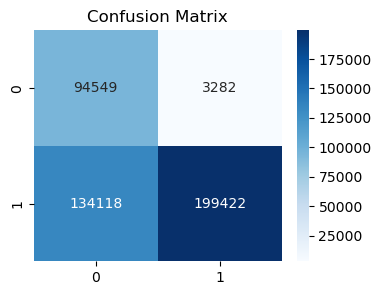

In [51]:
with open('model_1_logreg_randomsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()

In [34]:
loaded_model_pickle.best_params_

{'prediction__C': 7.915074397656213,
 'prediction__l1_ratio': 0.6371651421518383,
 'preprocessing__cat_processing__select_k__k': 1}

### grid search

              precision    recall  f1-score   support

       False       0.47      0.98      0.64     97831
        True       0.99      0.68      0.81    333540

    accuracy                           0.75    431371
   macro avg       0.73      0.83      0.72    431371
weighted avg       0.87      0.75      0.77    431371



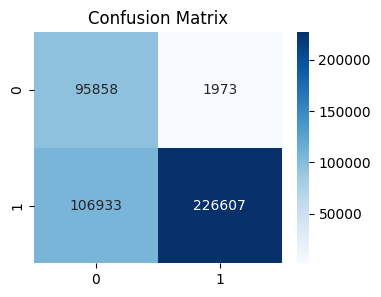

In [13]:
with open('model_1_logreg_gridsearch.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

prediction_cic = loaded_model_pickle.best_estimator_.predict(X_cic)
print(classification_report(y_cic, prediction_cic))
conf_mat = confusion_matrix(y_cic, prediction_cic)
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat, cmap='Blues', annot=True, fmt='2')
plt.title('Confusion Matrix')
plt.show()